# **Lorenz System Simulation and Visualization**



In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **Data Preparation**

In [6]:
def prepare_time_series(total_time: float = 40.0, dt: float = 0.01) -> np.ndarray:

    return np.arange(0.0, total_time, dt)


def initial_conditions() -> np.ndarray:

    return np.array([0.0, 1.0, 1.05])


# **Model Training**  

In [7]:
# Integration using RK4
def rk4_integrator(f, x0: np.ndarray, t: np.ndarray) -> np.ndarray:

    X = np.zeros((len(t), len(x0)))
    X[0] = x0

    for i in range(len(t) - 1):
        dt = t[i + 1] - t[i]
        k1 = f(X[i], t[i])
        k2 = f(X[i] + 0.5 * dt * k1, t[i] + 0.5 * dt)
        k3 = f(X[i] + 0.5 * dt * k2, t[i] + 0.5 * dt)
        k4 = f(X[i] + dt * k3, t[i] + dt)
        X[i + 1] = X[i] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

    return X


def system_as_written(x, t, a: float = 10.0, b: float = 28.0, c: float = 2.667) -> np.ndarray:

    dx = a * (x[1] - b)
    dy = b * x[0] - x[1] - x[0] * x[2]
    dz = x[0] * x[1] - c * x[2]
    return np.array([dx, dy, dz], dtype=float)


def system_lorenz(x, t, a: float = 10.0, b: float = 28.0, c: float = 2.667) -> np.ndarray:

    dx = a * (x[1] - x[0])
    dy = x[0] * (b - x[2]) - x[1]
    dz = x[0] * x[1] - c * x[2]
    return np.array([dx, dy, dz], dtype=float)


# **Model Inference**

In [8]:
def plot_trajectory(X: np.ndarray, title: str, out_path: str) -> None:

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(X[:, 0], X[:, 1], X[:, 2], lw=0.8)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close(fig)


def display_results(image_paths: list) -> None:

    for img_path in image_paths:
        img = cv2.imread(img_path)
        cv2_imshow(img)

# **Result & Visulaization**

/tmp/ipython-input-3679342220.py:21: RuntimeWarning: overflow encountered in scalar multiply
  dy = b * x[0] - x[1] - x[0] * x[2]
/tmp/ipython-input-3679342220.py:22: RuntimeWarning: overflow encountered in scalar multiply
  dz = x[0] * x[1] - c * x[2]
/tmp/ipython-input-3679342220.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  dz = x[0] * x[1] - c * x[2]
/tmp/ipython-input-3679342220.py:10: RuntimeWarning: invalid value encountered in add
  k2 = f(X[i] + 0.5 * dt * k1, t[i] + 0.5 * dt)


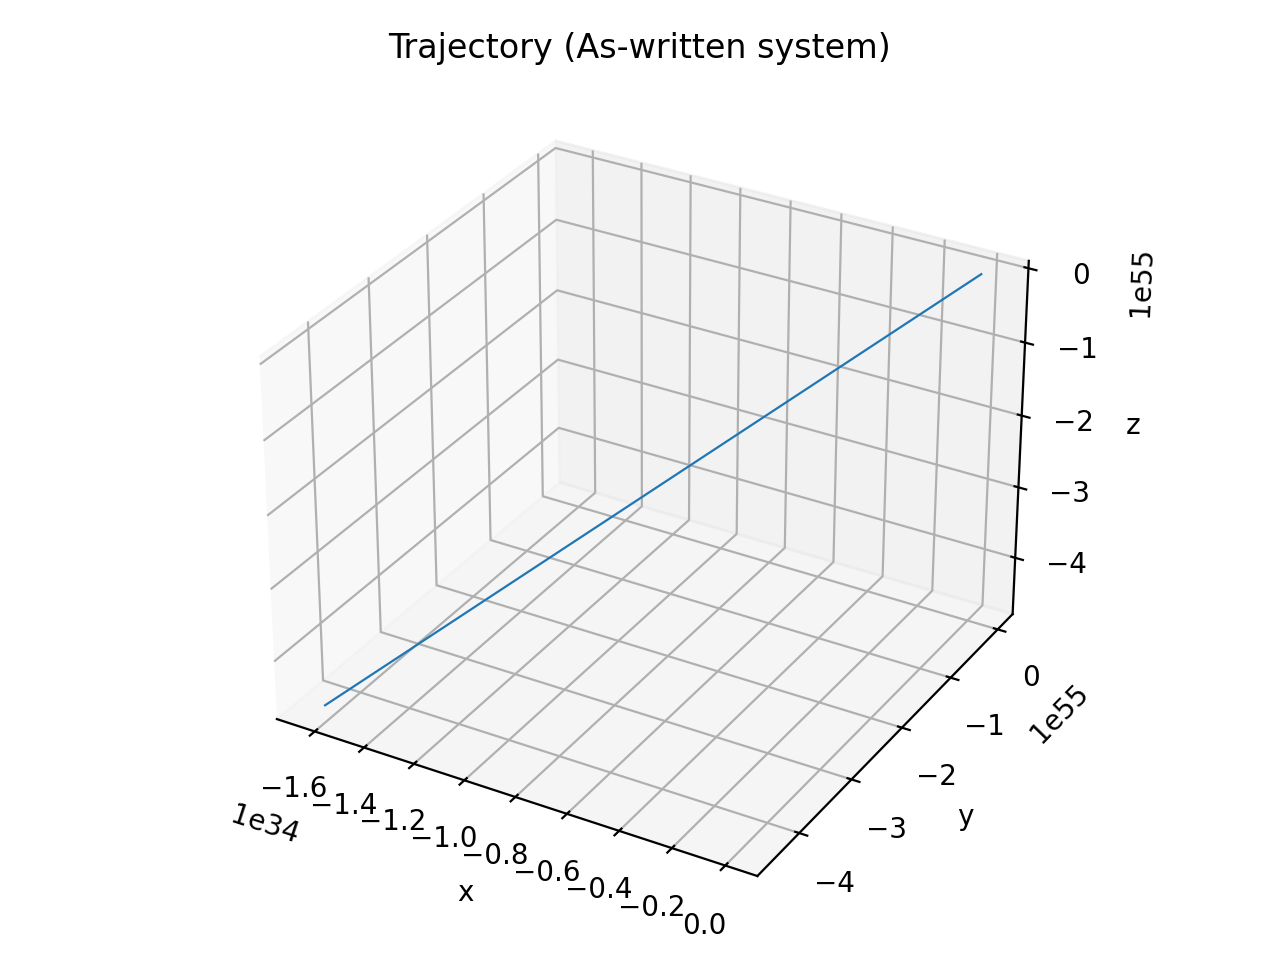

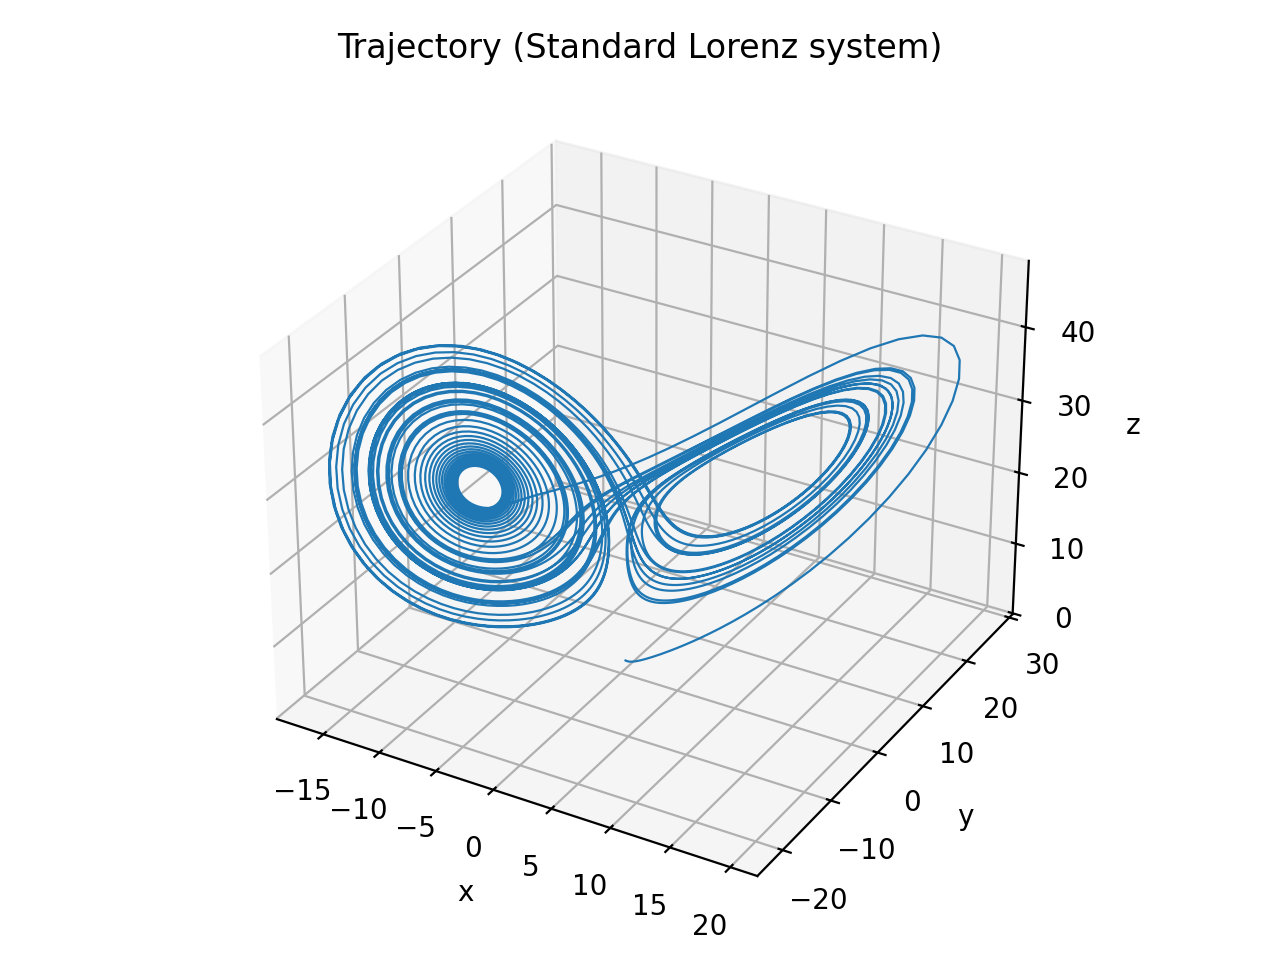

In [9]:
def main():

    # Data Preparation
    t = prepare_time_series(total_time=40.0, dt=0.01)
    x0 = initial_conditions()

    # Model Training (Integration)
    Xa = rk4_integrator(system_as_written, x0, t)
    Xl = rk4_integrator(system_lorenz, x0, t)

    # Result Visualization
    plot_trajectory(Xa, "Trajectory (As-written system)", "trajectory_as_written.png")
    plot_trajectory(Xl, "Trajectory (Standard Lorenz system)", "trajectory_lorenz.png")

    # Display Results
    display_results(["trajectory_as_written.png", "trajectory_lorenz.png"])


if __name__ == "__main__":
    main()
